# Problem Statement & Business Objective

## Project Brief


You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business Understanding

Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment

It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

## Business objective

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

## Goals of data analysis

Your goals are divided into three sub-goals:<br><br>
<b>Investment type analysis:</b> Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.<br><br>
<b>Country analysis:</b> Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.<br><br>
<b>Sector analysis:</b> Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Load the datasets

In [3]:
companies = pd.read_csv("input/companies.csv",encoding='ISO-8859-1')
rounds2 = pd.read_csv("input/rounds2.csv",encoding='ISO-8859-1')
mapping = pd.read_csv("input/mapping.csv")

In [4]:
print(f"Companies Shape:{companies.shape}")
print(f"Rounds2 Shape:{rounds2.shape}")
print(f"Mapping Shape:{mapping.shape}")

Companies Shape:(66368, 10)
Rounds2 Shape:(114949, 6)
Mapping Shape:(688, 10)


In [5]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan


In [7]:
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


# Checkpoint 1 - Data Preprocessing


##  How many unique companies are present in rounds2?

### Standardize data - convert company_permalink to lower case

In [8]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

### Convert special characters present in the permalink
NOTE: Noticed while comparing the company permalink between companies & round2, but the encoding/decoding needs to be done here

In [9]:
rounds2['company_permalink']= rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))


### Get no. of unique companies based on company_permalink

In [10]:
rounds2.nunique()

company_permalink           66368
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

<b>ANSWER:</b> No. of unique companies in rounds2 = 66368

##  How many unique companies are present in the companies file?

### Standardize data - convert company_permalink to lower case

In [11]:
companies['permalink'] = companies['permalink'].str.lower()

### Convert special characters present in the permalink
NOTE: Noticed while comparing the company permalink between companies & round2, but cleanup needs to be done here

In [12]:
companies['permalink']= companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

### Get no. of unique companies based on permalink

In [13]:
companies.nunique()

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

<b>ANSWER:</b> No. of unique companies in companies = 66368

## In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [14]:
companies.shape

(66368, 10)

In [15]:
companies.nunique()

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

<b>ANSWER:</b> permalink columns can be used as unique key

##  Are there any companies in the rounds2 file which are not present in companies ? Answer Y/N.

In [16]:
set(rounds2['company_permalink']).difference(set(companies['permalink']))

set()

In [17]:
set(companies['permalink']).difference(set(rounds2['company_permalink']))

set()

<b>ANSWER:</b> N <br>
Both rounds2 and companies dataframes have the same set of companies

##  Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [18]:
master_frame = pd.merge(rounds2,companies,how="left",left_on = 'company_permalink',right_on = 'permalink')

In [19]:
master_frame.shape

(114949, 16)

Result: No. of observatiions in master_frame = 114949

## Data cleanup

### Removing missing investment amount rows

In [20]:
# Missing percentage in each column
master_frame.isnull().sum()/len(master_frame.index)*100

company_permalink          0.00000
funding_round_permalink    0.00000
funding_round_type         0.00000
funding_round_code        72.90973
funded_at                  0.00000
raised_amount_usd         17.39032
permalink                  0.00000
name                       0.00087
homepage_url               5.33628
category_list              2.96653
status                     0.00000
country_code               7.54943
state_code                 9.52248
region                     8.84479
city                       8.84218
founded_at                17.85226
dtype: float64

In [21]:
master_frame['raised_amount_usd'].describe()

count         94959.00000
mean       10426869.33450
std       114821247.98486
min               0.00000
25%          322500.00000
50%         1680511.00000
75%         7000000.00000
max     21271935000.00000
Name: raised_amount_usd, dtype: float64

In [22]:
# Remove rows without the raised amount as the investment analysis is based on the raised amount ranging from 5M to 15M

master_frame = master_frame.dropna(subset = ['raised_amount_usd'])

### Imputing missing values for country_code and category_list

In [23]:
master_frame['country_code']=master_frame['country_code'].fillna('UNK_CTR')

In [24]:
master_frame['category_list']=master_frame['category_list'].fillna('UNK_CAT')

In [25]:
# Check the missing values
master_frame[['raised_amount_usd','country_code','category_list']].isnull().sum()/len(master_frame.index)*100

raised_amount_usd   0.00000
country_code        0.00000
category_list       0.00000
dtype: float64

# Checkpoint 2 - Funding Type Analysis

In [26]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

## Get the total invested amount (in millions) for the 4 funding types

In [27]:
# Filter master frame for the 4 funding types - seed, venture, angel, private equity
master_frame_4FT = master_frame[master_frame['funding_round_type'].isin(['seed','venture','angel','private_equity'])]
master_frame_4FT['raised_amount_usd'] = master_frame_4FT['raised_amount_usd']/1000000

/Users/le0080/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Identify the Representative Value - Median ( in millions)

In [28]:
funds = master_frame_4FT.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
funds

funding_round_type
private_equity   20.00000
venture           5.00000
angel             0.40000
seed              0.27500
Name: raised_amount_usd, dtype: float64

ANSWER: "venture" funding type is in the range of 5M to 15M per investment round (based on the median value)

## Additional exploration

### Box plot to check for outliers

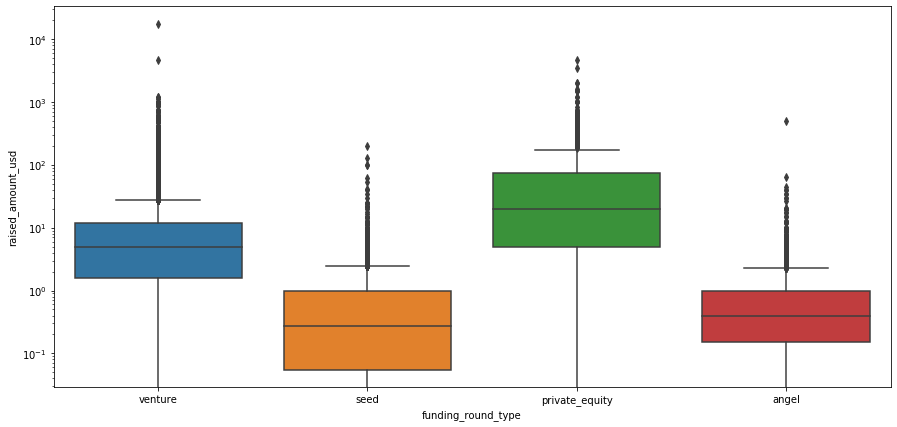

In [29]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 7))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_4FT)
plt.yscale('log')
plt.show()

There are outliers in the data for each of the funding types.<br>
But we cannot remove the outliers as it could be genuine cases where these companies got more investments

### Invested amount mean on funding type

In [30]:
mean_funds = master_frame_4FT.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
mean_funds

funding_round_type
private_equity   73.30859
venture          11.74895
angel             0.95869
seed              0.71982
Name: raised_amount_usd, dtype: float64

The average investment made in venture type funds is 11.74M$

### Venture type funds - analysis

In [31]:
funds_venture_type = master_frame[master_frame['funding_round_type']=='venture']

In [32]:
print(f"Total No. of Funds:{master_frame.shape[0]}")
print(f"No. of Venture Type Funds:{funds_venture_type.shape[0]}")
print(f"Percentage of Venture Type Funds:{round(funds_venture_type.shape[0]/master_frame.shape[0]*100,2)}%")
funds_venture_type['raised_amount_usd'].describe()

Total No. of Funds:94959
No. of Venture Type Funds:50228
Percentage of Venture Type Funds:52.89%


count         50228.00000
mean       11748949.12949
std        86352066.55796
min               0.00000
25%         1600901.75000
50%         5000000.00000
75%        12000000.00000
max     17600000000.00000
Name: raised_amount_usd, dtype: float64

### Pie chart for the funds

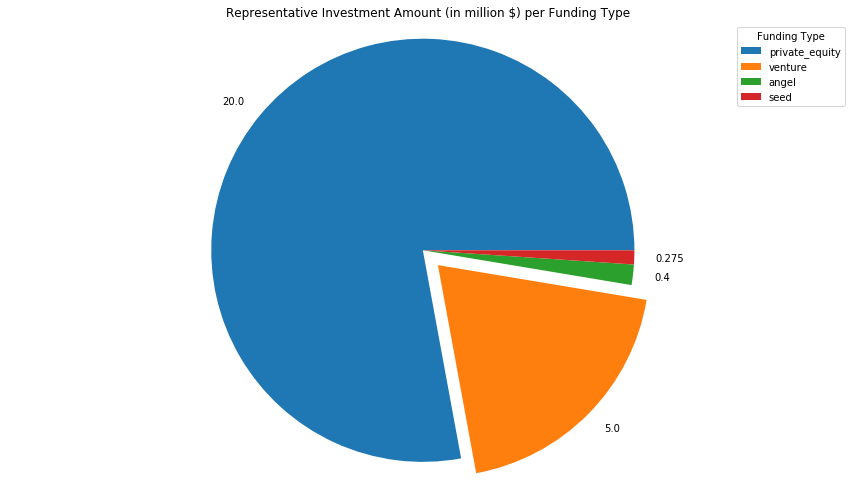

In [33]:
f, ax = plt.subplots(figsize=(12,7)) 
# only "explode" the 2nd slice (i.e. 'Venture')
explode = (0, 0.1, 0, 0)
ax.pie(funds, explode=explode, labels=funds)#, colors=colors)
plt.legend(funds.index, loc="best", title = 'Funding Type')
plt.title('Representative Investment Amount (in million $) per Funding Type')
ax.axis('equal')
plt.tight_layout()
plt.show()


 

# Checkpoint 3 - Country Analysis

## Countries with highest total funding

In [34]:
maxfunds_country = pd.DataFrame(master_frame.groupby(['funding_round_type','country_code'])['raised_amount_usd'].sum().sort_values(ascending=False))

In [35]:
maxfunds_country.reset_index(level=0,inplace=True)

## Top nine countries (top9) with funding type = 'venture'

In [36]:
# Filter for total funds made in the funding type venture for the top 9 countries
top9 = maxfunds_country[maxfunds_country['funding_round_type']=='venture'].iloc[0:9]
top9.reset_index(level=0,inplace = True)

### Add flag: Is English official language?

Reference link: https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [37]:
# Set the list of countries with English as official language (extracted from the wiki link mentioned above)
countries_ENG_official = ['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']

In [38]:
# Add a flag to indicate if English is an official language in that country
top9['is_ENG_official'] = top9['country_code'].apply(lambda x:x in countries_ENG_official)

In [39]:
top9

,country_code,funding_round_type,raised_amount_usd,is_ENG_official
0,USA,venture,422510842796.00000,True
1,CHN,venture,39835418773.00000,False
2,UNK_CTR,venture,25506108414.00000,False
3,GBR,venture,20245627416.00000,True
4,IND,venture,14391858718.00000,True
5,CAN,venture,9583332317.00000,True
6,FRA,venture,7259536732.00000,False
7,ISR,venture,6907514579.00000,False
8,DEU,venture,6346959822.00000,False


<b>ANSWER:</b> 
    
Top 3 English speaking countries:
1. USA
2. GBR
3. IND

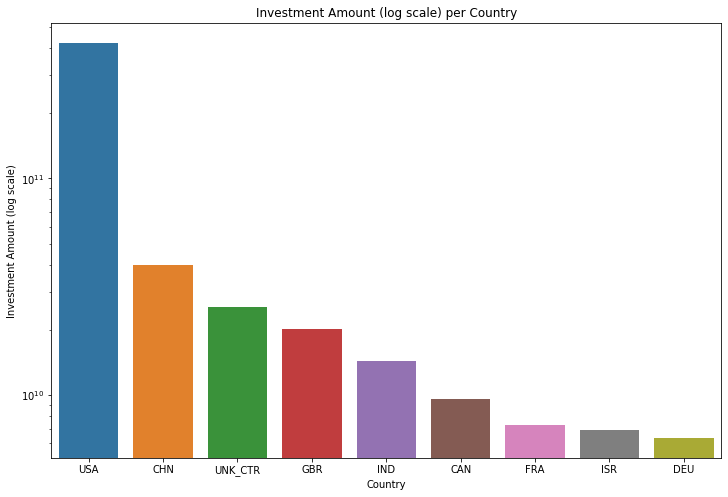

In [40]:
# Plot a bar chart on the total investment amount. Log scale used as the investment in USA is very hight compared to other countries
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top9['country_code'], y=top9['raised_amount_usd'])
ax.set(xlabel='Country', ylabel='Investment Amount (log scale)',title = 'Investment Amount (log scale) per Country')
plt.yscale('log')
plt.show()

# Checkpoint 4 - Sector Analysis

In [41]:
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00000,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,UNK_CTR,NaN,NaN,NaN,NaN


## Extract the primary sector of each category list from the category_list column



First string before the vertical bar will be considered the primary sector

In [42]:
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: str(x).split('|')[0])

## Mapping Cleanup: check if all the primary_sector entries are present in the mapping file

In [43]:
set(master_frame['primary_sector']).difference(set(mapping['category_list']))

{'Adaptive Equipment',
 'Alternative Medicine',
 'Analytics',
 'Big Data Analytics',
 'Biotechnology and Semiconductor',
 'Business Analytics',
 'Cannabis',
 'Career Management',
 'Cause Marketing',
 'China Internet',
 'Cloud Management',
 'Contact Management',
 'Darknet',
 'Deep Information Technology',
 'Digital Rights Management',
 'Digital Signage',
 'Document Management',
 'Educational Games',
 'Energy Management',
 'English-Speaking',
 'Enterprise Hardware',
 'Event Management',
 'Finance',
 'Finance Technology',
 'Financial Exchanges',
 'Financial Services',
 'Fleet Management',
 'Generation Y-Z',
 'Golf Equipment',
 'Google Glass',
 'Governance',
 'GreenTech',
 'Group Email',
 'IT Management',
 'Identity Management',
 'Innovation Management',
 'Intellectual Asset Management',
 'Internet TV',
 'Internet Technology',
 'Investment Management',
 'Journalism',
 'Kinect',
 'Knowledge Management',
 'Lead Management',
 'Lingerie',
 'Medical Professionals',
 'Mobile Analytics',
 'Mobile

In [44]:
set(mapping['category_list']).difference(set(master_frame['primary_sector']))

{'0notechnology',
 '0tural Language Processing',
 '0tural Resources',
 '0vigation',
 'A0lytics',
 'Alter0tive Medicine',
 'Big Data A0lytics',
 'Business A0lytics',
 'Can0bis',
 'Career Ma0gement',
 'Chi0 Internet',
 'Cloud Ma0gement',
 'Contact Ma0gement',
 'Digital Rights Ma0gement',
 'Digital Sig0ge',
 'Document Ma0gement',
 'Educatio0l Games',
 'Energy Ma0gement',
 'Event Ma0gement',
 'Fi0nce',
 'Fi0nce Technology',
 'Fi0ncial Exchanges',
 'Fi0ncial Services',
 'Film Distribution',
 'Fleet Ma0gement',
 'Flowers',
 'Gover0nce',
 'IT Ma0gement',
 'Identity Ma0gement',
 'Innovation Ma0gement',
 'Intellectual Asset Ma0gement',
 'Investment Ma0gement',
 'Jour0lism',
 'Knowledge Ma0gement',
 'Lead Ma0gement',
 'Lotteries',
 'Low Bid Auctions',
 'Medical Professio0ls',
 'Mobile A0lytics',
 'Multi-level Marketing',
 'Perso0l Branding',
 'Perso0l Data',
 'Perso0l Fi0nce',
 'Perso0l Health',
 'Perso0lization',
 'Pervasive Computing',
 'Plumbers',
 'Predictive A0lytics',
 'Professio0l Network

CONCLUSION: na in mappings file has been replaced with 0. Put back na and change to lower case for sector name in both the dataframes

### Fill NAs in mapping file with UNK_CAT

In [45]:
mapping['category_list']=mapping['category_list'].fillna('UNK_CAT')

### Convert category_list to lower case in mapping & replace 0 with na

In [46]:
mapping['category_list'] = mapping['category_list'].apply(lambda x:str.lower(x.replace('0','na')))

### Convert primary_sector to lower case in master frame

In [47]:
master_frame['primary_sector'] = master_frame['primary_sector'].apply(lambda x:str.lower(x))

### Check the difference between category names in master frame and mapping dataframes

In [48]:
set(master_frame['primary_sector']).difference(set(mapping['category_list']))

{'adaptive equipment',
 'biotechnology and semiconductor',
 'cause marketing',
 'darknet',
 'deep information technology',
 'english-speaking',
 'enterprise 2.0',
 'enterprise hardware',
 'generation y-z',
 'golf equipment',
 'google glass',
 'greentech',
 'group email',
 'internet technology',
 'internet tv',
 'kinect',
 'lingerie',
 'mobile emergency&health',
 'natural gas uses',
 'nightlife',
 'product search',
 'psychology',
 'racing',
 'rapidly expanding',
 'real estate investors',
 'registrars',
 'retirement',
 'self development',
 'sex industry',
 'skill gaming',
 'social media advertising',
 'spas',
 'specialty retail',
 'sponsorship',
 'subscription businesses',
 'swimming',
 'testing',
 'toys',
 'vacation rentals'}

In [49]:
set(mapping['category_list']).difference(set(master_frame['primary_sector']))

{'enterprise 2.na',
 'film distribution',
 'flowers',
 'lotteries',
 'low bid auctions',
 'multi-level marketing',
 'pervasive computing',
 'plumbers',
 'social recruiting',
 'veterinary',
 'virtual workforces'}

### Fix categories where "0" was incorrectly replaced with na

In [50]:
mapping['category_list'] = mapping['category_list'].replace('enterprise 2.na','enterprise 2.0')

## Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors


In [51]:
# Mapping file has the data one-hot encoded
# Reverse of one-hot encoding done to get the category

# Function to get column name if value is 1
def get_main_sector_name(row):
    return(row.index[row.apply(lambda x: x==1)][0])

# create a new column with main_sector_name in the mapping df
mapping['main_sector'] = mapping.apply(lambda row:get_main_sector_name(row), axis=1)

In [52]:
display(mapping.head(5))

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,unk_cat,0,1,0,0,0,0,0,0,0,Blanks
1,3d,0,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [53]:
master_frame_with_sectors = pd.merge(master_frame,mapping[['category_list','main_sector']],how='left',left_on='primary_sector',right_on='category_list')

In [54]:
master_frame_with_sectors.shape

(94959, 19)

### Fill NAs in main_sector with "unknown"

In [55]:
master_frame_with_sectors['main_sector'] = master_frame_with_sectors['main_sector'].fillna('unknown')

# Checkpoint 5 - Sector Analysis 2

Filter on 
1. Funding Type = "venture"
2. Investment range = 5-15 M USD

In [56]:
master_frame_FT_InvestmentRange= master_frame_with_sectors[(master_frame_with_sectors['funding_round_type'] == 'venture') & (master_frame_with_sectors['raised_amount_usd'] >= 5000000) & (master_frame_with_sectors['raised_amount_usd'] <= 15000000)]

Filter on
Top 3 English speaking countries - 'USA', 'GBR', 'IND'

In [57]:
D1 = master_frame_FT_InvestmentRange[master_frame_FT_InvestmentRange['country_code'] == 'USA']
D2 = master_frame_FT_InvestmentRange[master_frame_FT_InvestmentRange['country_code'] == 'GBR']
D3 = master_frame_FT_InvestmentRange[master_frame_FT_InvestmentRange['country_code'] == 'IND']

In [58]:
print(f"Shape D1: {D1.shape}")
print(f"Shape D2: {D2.shape}")
print(f"Shape D3: {D3.shape}")


Shape D1: (12150, 19)
Shape D2: (628, 19)
Shape D3: (330, 19)


## Total No. of Investments in each country for type Venture and funds between 5 million & 15 million

In [59]:
print(f"Total No. of Investments - USA:{D1.shape[0]}")
print(f"Total No. of Investments - GBR:{D2.shape[0]}")
print(f"Total No. of Investments - IND:{D3.shape[0]}")

Total No. of Investments - USA:12150
Total No. of Investments - GBR:628
Total No. of Investments - IND:330


## Total Amount of Investment

In [60]:
print(f"Total Amount of Investment - USA:{D1['raised_amount_usd'].sum()}")
print(f"Total Amount of Investment - GBR:{D2['raised_amount_usd'].sum()}")
print(f"Total Amount of Investment - IND:{D3['raised_amount_usd'].sum()}")

Total Amount of Investment - USA:108531347515.0
Total Amount of Investment - GBR:5436843539.0
Total Amount of Investment - IND:2976543602.0


## Investments per main sector in each country for type Venture and funds between 5 million & 15 million

### Get no. of investments per main sector - USA

In [61]:
D1sectors = D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
D1sectors

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Blanks                                       86
unknown                                       1
Name: raised_amount_usd, dtype: int64

### Get distribution per sector in % - USA

In [62]:
D1USA = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)/D1.groupby('main_sector')['raised_amount_usd'].count().sum()*100)
D1USA

,raised_amount_usd
main_sector,
Others,24.27984
"Social, Finance, Analytics, Advertising",22.33745
Cleantech / Semiconductors,19.34156
"News, Search and Messaging",13.02881
Health,7.48148
Manufacturing,6.57613
Entertainment,4.86420
Automotive & Sports,1.37449
Blanks,0.70782


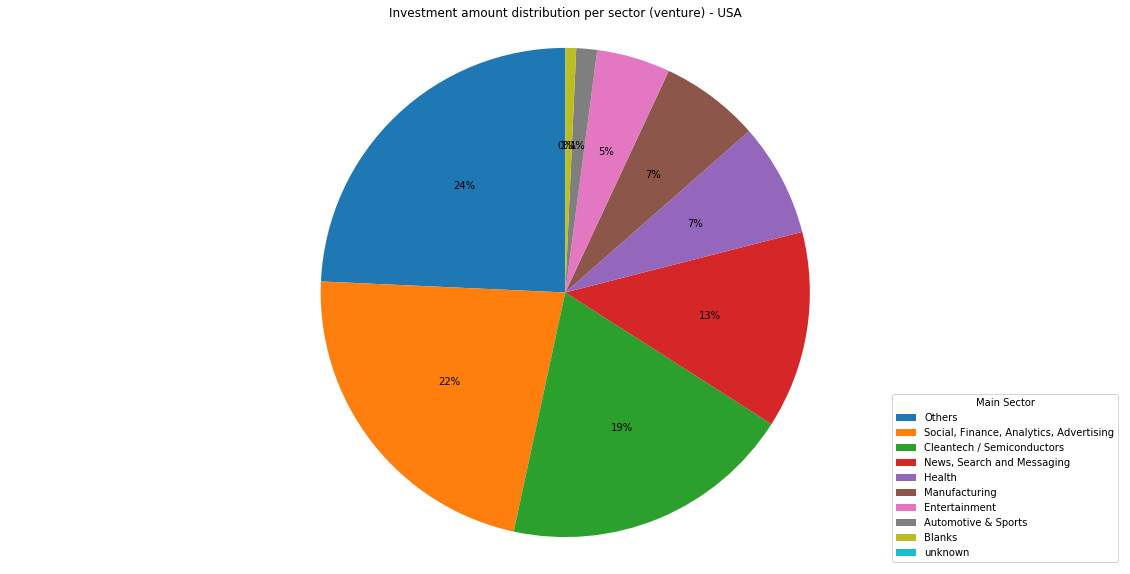

In [63]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20,10))
plt.pie(D1USA['raised_amount_usd'],  startangle=90, autopct='%1.0f%%')
plt.legend(D1USA.index, loc="lower right", title = 'Main Sector')

plt.axis('equal')
plt.title('Investment amount distribution per sector (venture) - USA')

plt.show()

### Total Investment Amount per Sector - USA

In [64]:
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    26321007002.00000
Social, Finance, Analytics, Advertising   23807376964.00000
Cleantech / Semiconductors                21633430822.00000
News, Search and Messaging                13971567428.00000
Health                                     8211859357.00000
Manufacturing                              7258553378.00000
Entertainment                              5099197982.00000
Automotive & Sports                        1454104361.00000
Blanks                                      764763292.00000
unknown                                       9486929.00000
Name: raised_amount_usd, dtype: float64

### Get no. of investments per main sector - GBR

In [65]:
D2sectors = D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
D2sectors


main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Blanks                                       7
Name: raised_amount_usd, dtype: int64

### Get distribution per sector in % - GBR

In [66]:
D2GBR = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)/D2.groupby('main_sector')['raised_amount_usd'].count().sum()*100)
D2GBR

,raised_amount_usd
main_sector,
Others,23.40764
"Social, Finance, Analytics, Advertising",21.17834
Cleantech / Semiconductors,20.70064
"News, Search and Messaging",11.62420
Entertainment,8.91720
Manufacturing,6.68790
Health,3.82166
Automotive & Sports,2.54777
Blanks,1.11465


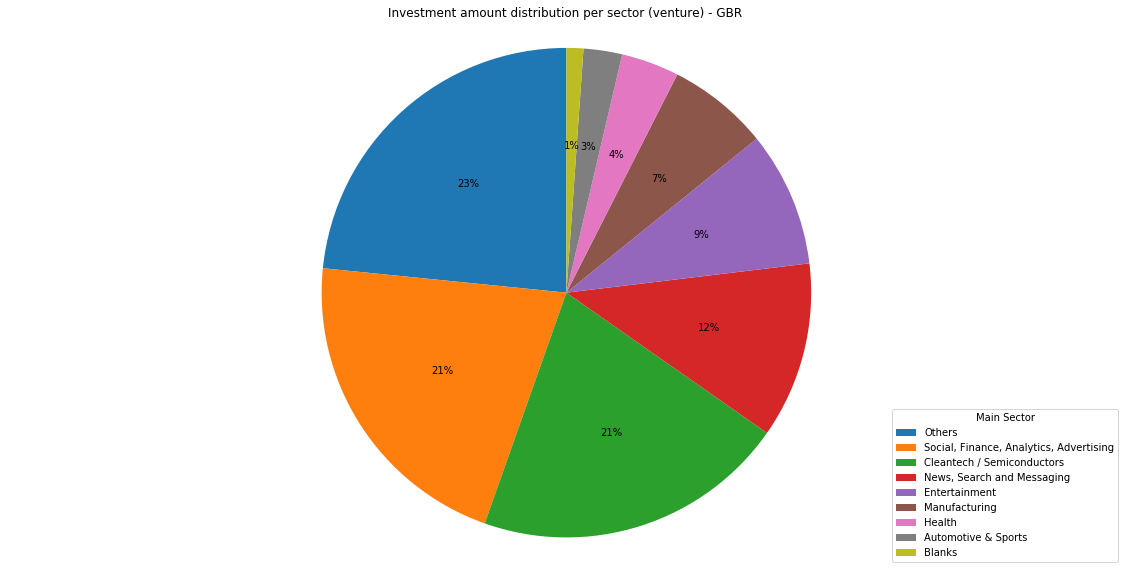

In [67]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20,10))
plt.pie(D2GBR['raised_amount_usd'],  startangle=90, autopct='%1.0f%%')
plt.legend(D2GBR.index, loc="lower right", title = 'Main Sector')

plt.axis('equal')
plt.title('Investment amount distribution per sector (venture) - GBR')

plt.show()

### Total Investment Amount per Sector - GBR

In [68]:
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    1283624289.00000
Cleantech / Semiconductors                1163990056.00000
Social, Finance, Analytics, Advertising   1089404014.00000
News, Search and Messaging                 615746235.00000
Entertainment                              482784687.00000
Manufacturing                              361940335.00000
Health                                     214537510.00000
Automotive & Sports                        167051565.00000
Blanks                                      57764848.00000
Name: raised_amount_usd, dtype: float64

### Get no. of investments per main sector - IND

In [69]:
D3sectors = D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
D3sectors

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Blanks                                       2
Name: raised_amount_usd, dtype: int64

### Get distribution per sector in % - IND

In [70]:
D3IND = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)/D3.groupby('main_sector')['raised_amount_usd'].count().sum()*100)
D3IND

,raised_amount_usd
main_sector,
Others,33.33333
"Social, Finance, Analytics, Advertising",18.18182
"News, Search and Messaging",15.75758
Entertainment,10.00000
Manufacturing,6.36364
Cleantech / Semiconductors,6.06061
Health,5.75758
Automotive & Sports,3.93939
Blanks,0.60606


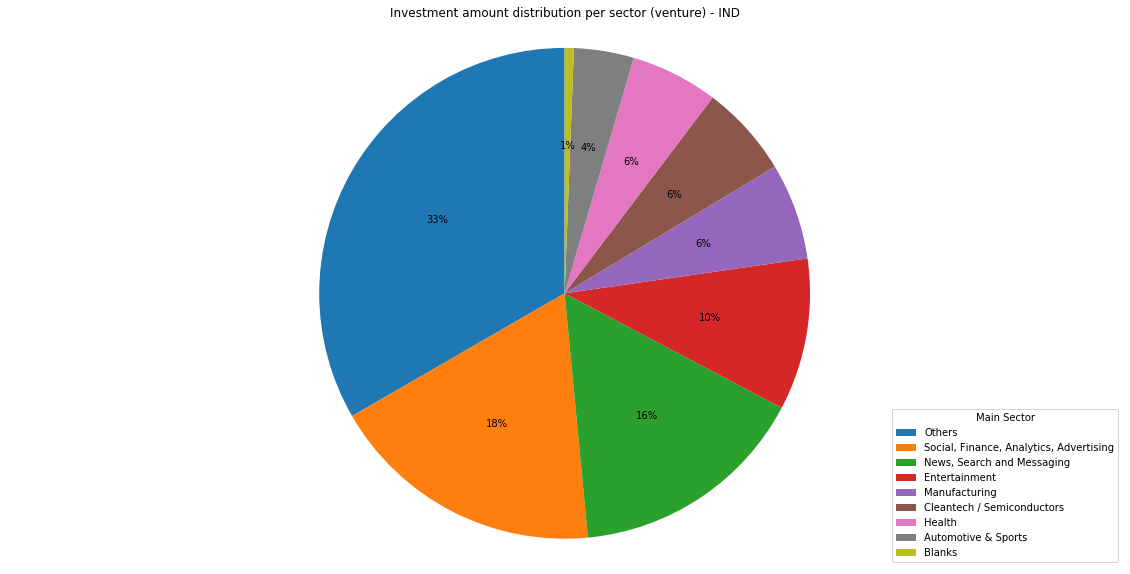

In [71]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20,10))
plt.pie(D3IND['raised_amount_usd'],  startangle=90, autopct='%1.0f%%')
plt.legend(D3IND.index, loc="lower right", title = 'Main Sector')

plt.axis('equal')
plt.title('Investment amount distribution per sector (venture) - IND')

plt.show()

### Total Investment Amount per sector

In [72]:
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    1013409507.00000
Social, Finance, Analytics, Advertising    550549550.00000
News, Search and Messaging                 433834545.00000
Entertainment                              280830000.00000
Manufacturing                              200900000.00000
Health                                     167740000.00000
Cleantech / Semiconductors                 165380000.00000
Automotive & Sports                        136900000.00000
Blanks                                      27000000.00000
Name: raised_amount_usd, dtype: float64

## For point 3 (top sector count-wise), which company received the highest investment?

In [73]:
D1[D1['main_sector'] == "Others"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/virtustream         64300000.00000
/organization/capella             54968051.00000
/organization/airtight-networks   54201907.00000
Name: raised_amount_usd, dtype: float64

In [74]:
D2[D2['main_sector'] == "Others"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/electric-cloud   37000000.00000
/organization/sensage          36250000.00000
/organization/enigmatic        32500000.00000
Name: raised_amount_usd, dtype: float64

In [75]:
D3[D3['main_sector'] == "Others"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/firstcry-com   39000000.00000
/organization/myntra         38000000.00000
/organization/commonfloor    32900000.00000
Name: raised_amount_usd, dtype: float64

## For point 4 (second best sector count-wise), which company received the highest investment?

In [76]:
D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/shotspotter   67933006.00000
/organization/demandbase    63000000.00000
/organization/intacct       61800000.00000
Name: raised_amount_usd, dtype: float64

In [77]:
D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/celltick-technologies   37500000.00000
/organization/mythings                34000000.00000
/organization/zopa                    32900000.00000
Name: raised_amount_usd, dtype: float64

In [78]:
D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising"].groupby('company_permalink')["raised_amount_usd"].sum().sort_values(ascending=False).head(3)

company_permalink
/organization/manthan-systems   50700000.00000
/organization/komli-media       28000000.00000
/organization/shopclues-com     25000000.00000
Name: raised_amount_usd, dtype: float64

# Checkpoint 6 - Plots

## Plot showing the representative amount of investment in each funding type

A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [79]:
funds

funding_round_type
private_equity   20.00000
venture           5.00000
angel             0.40000
seed              0.27500
Name: raised_amount_usd, dtype: float64

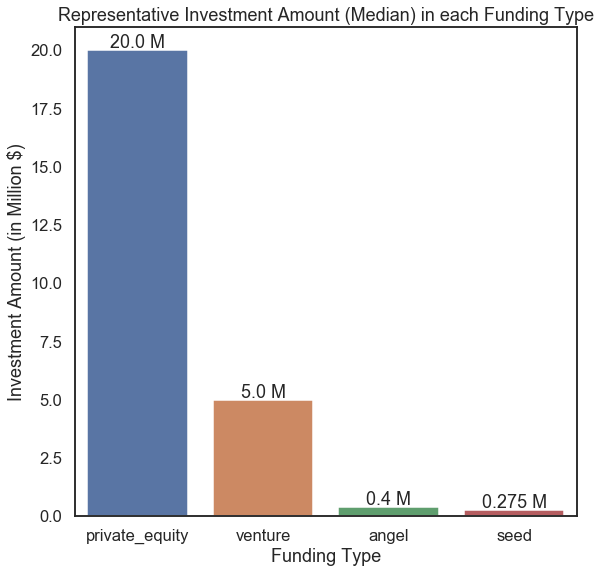

In [80]:
import seaborn as sns
sns.set(style="white", context="talk")
f, ax = plt.subplots(figsize=(9,9))
ax = sns.barplot(x=funds.index,y=funds) 
ax.set(xlabel='Funding Type', ylabel='Investment Amount (in Million $)',title='Representative Investment Amount (Median) in each Funding Type')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, f"{funds[i]} M",ha="center")
plt.show()

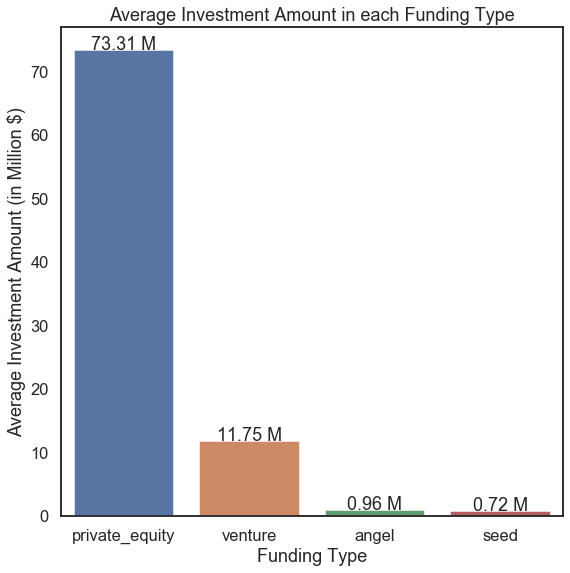

In [81]:
import seaborn as sns
sns.set(style="white", context="talk")
f, ax = plt.subplots(figsize=(9,9))
ax = sns.barplot(x=mean_funds.index,y=mean_funds) 
ax.set(xlabel='Funding Type', ylabel='Average Investment Amount (in Million $)',title='Average Investment Amount in each Funding Type')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, f"{round(mean_funds[i],2)} M",ha="center")
plt.show()

In [82]:
print(mean_funds)

funding_round_type
private_equity   73.30859
venture          11.74895
angel             0.95869
seed              0.71982
Name: raised_amount_usd, dtype: float64


## Top 9 countries plot

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

In [83]:
print(top9)

  country_code funding_round_type  raised_amount_usd  is_ENG_official
0          USA            venture 422510842796.00000             True
1          CHN            venture  39835418773.00000            False
2      UNK_CTR            venture  25506108414.00000            False
3          GBR            venture  20245627416.00000             True
4          IND            venture  14391858718.00000             True
5          CAN            venture   9583332317.00000             True
6          FRA            venture   7259536732.00000            False
7          ISR            venture   6907514579.00000            False
8          DEU            venture   6346959822.00000            False


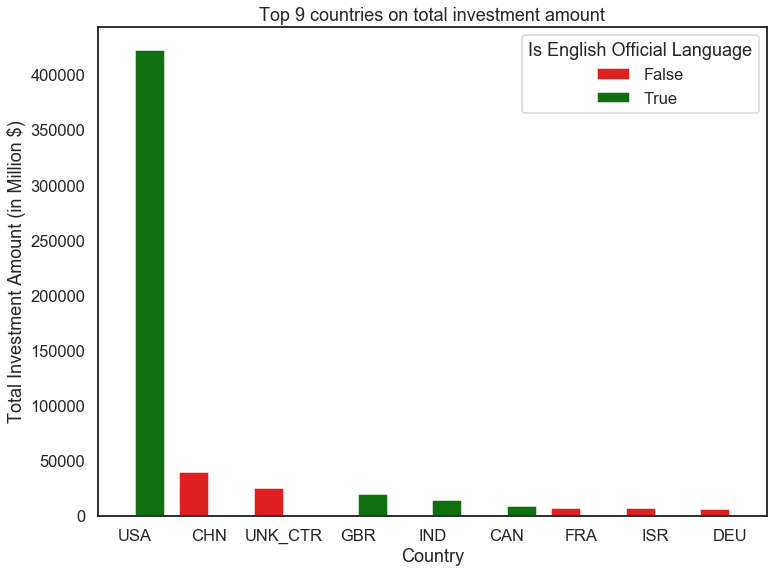

In [84]:
import seaborn as sns
sns.set(style="white", context="talk")
f, ax = plt.subplots(figsize=(12,9))
hue_colors = {False: "red", True: "black"}
ax = sns.barplot(y=top9['raised_amount_usd']/1000000,x = top9['country_code'], hue = top9['is_ENG_official'],palette = ["red","green"])
ax.set( xlabel='Country',ylabel='Total Investment Amount (in Million $)',title = 'Top 9 countries on total investment amount')
plt.legend(title = "Is English Official Language")
plt.show()

## No. of investments in top 3 sectors of top 3 countries

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

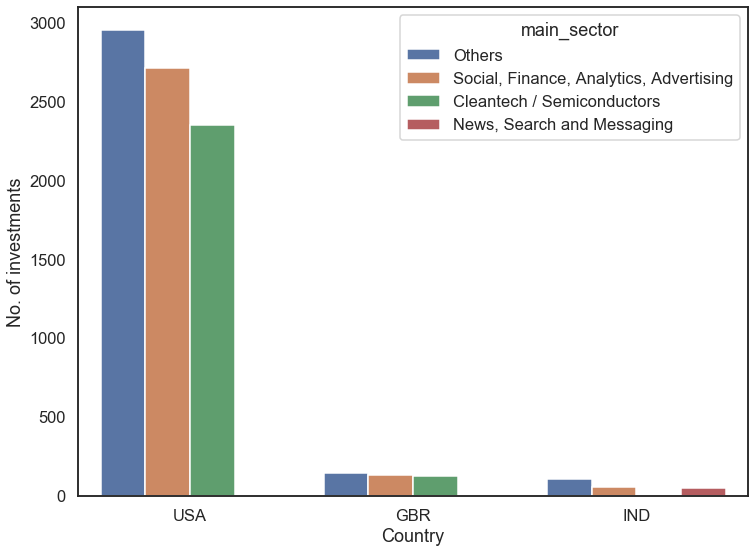

In [85]:

D1top3 = D1sectors.to_frame().reset_index().iloc[0:3,:]
D1top3['country'] = 'USA'
D2top3 = D2sectors.to_frame().reset_index().iloc[0:3,:]
D2top3['country'] = 'GBR'
D3top3 = D3sectors.to_frame().reset_index().iloc[0:3,:]
D3top3['country'] = 'IND'
top3 = pd.concat([D1top3, D2top3, D3top3])
top3.rename(columns = {'raised_amount_usd':'num_investments'}, inplace = True) 
sns.set(style="white", context="talk")
f, ax = plt.subplots(figsize=(12,9))
ax = sns.barplot(x=top3['country'],y=top3['num_investments'],hue=top3['main_sector']) 
ax.set(xlabel='Country', ylabel='No. of investments')
plt.show()

In [86]:
top3

,main_sector,num_investments,country
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA
0,Others,147,GBR
1,"Social, Finance, Analytics, Advertising",133,GBR
2,Cleantech / Semiconductors,130,GBR
0,Others,110,IND
1,"Social, Finance, Analytics, Advertising",60,IND
2,"News, Search and Messaging",52,IND
